##Import Library

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import glob
import os
import tqdm
from sklearn.model_selection import  train_test_split
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score`to be the 
from matplotlib import pyplot

##Import Image

In [ ]:
#Reference:
#/***************************************************************************************
#*    Title: <BME590_ML_Final_Project/BME590_Final_Project_keras.ipynb>
#*    Author: <Huisi Cai, Zhen Lin>
#*    Date: <2019>
#*    Code version: <N/A>
#*    Availability: <https://github.com/SylviaCHS/BME590_ML_Final_Project>
#*
#***************************************************************************************/


def read_feature(folder, num):
    filepath = glob.glob(os.path.join(folder, '*jpg'))
    img_arr = np.zeros([len(filepath), 40, 40, 3])
    label = num * np.ones(len(filepath), dtype="float32")
    for i, name in enumerate(filepath):
        img = Image.open(name)
        img_arr[i, :, :, :] = np.array(img, dtype="uint8")
    return img_arr, label

In [ ]:
import tensorflow as tf
pm_img_arr, pm_label = read_feature('/content/drive/My Drive/BME548L_final_project/plasmodium', 1)
non_pm_img_arr, non_pm_label = read_feature('/content/drive/My Drive/BME548L_final_project/Non-plasmodium_Image', 0)

(7097, 40, 40, 3)
(7097,)
Training data shape (6387, 40, 40, 3)
Training data shape (6387, 8)


numpy.ndarray

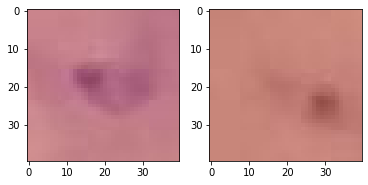

In [ ]:
images = np.concatenate((pm_img_arr, non_pm_img_arr))
labels = np.concatenate((pm_label, non_pm_label))

print(np.shape(images))
print(np.shape(labels))
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.1)

X_train = X_train.astype(np.float32)/255
X_val = X_val.astype(np.float32)/255
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)

# change into one-hot vector
y_train = tf.keras.utils.to_categorical(y_train, 8) 
y_val = tf.keras.utils.to_categorical(y_val, 8)

# reshape dataset
X_train = X_train.reshape(X_train.shape[0], 40, 40, 3)
X_val = X_val.reshape(X_val.shape[0], 40, 40, 3)

X_train=np.array(X_train)

from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
print('Training data shape', y_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(40, 40, 3),cmap=plt.cm.Greys);
ax2.imshow(X_train[1].reshape(40, 40, 3),cmap=plt.cm.Greys);
type(X_train)
#print(X_train[i,:,:,:])

##Define CNN1

In [ ]:
def k_model (image_size):
 inputL = tf.keras.layers.Input(image_size)
 num_filter = 8
 x = inputL
 x = tf.keras.layers.Conv2D(num_filter, 5, 1, activation = 'tanh', padding = 'same')(x)
 x = tf.keras.layers.Conv2D(num_filter, 5, 1, activation = 'relu', padding = 'same')(x)  
 
 x = tf.keras.layers.Conv2D(num_filter, 5, 1, activation = 'tanh', padding = 'same')(x)
 x = tf.keras.layers.Conv2D(num_filter, 5, 1, activation = 'relu', padding = 'same')(x)

 
 x = tf.keras.layers.Dense(8, activation='softmax')(x)
 x = tf.keras.layers.Flatten()(x)
 out = tf.keras.layers.Dense(8, activation='softmax')(x)
 model = tf.keras.Model(inputs=inputL, outputs=out)
 return model

##Define noise

In [ ]:
def add_noise(img, noise_sig):
  noise = tf.random.normal(shape = tf.shape(img), mean = 0.0, stddev = noise_sig,dtype = tf.float32)
  img += noise
  return img

##Optimize resolution of Image

In [ ]:
print(X_train.shape[0])
import cv2
def image_resize(img, num):
  dim = (num,num)
  image =cv2.resize(img, dim,interpolation=cv2.INTER_AREA)
  rimage = cv2.resize(image, dim,interpolation=cv2.INTER_AREA)
  rimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #plt.imshow(rimage)
  return rimage




6387


##Plot accuracy and loss

In [ ]:
def plot_loss_acc (history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  return


Change noise by changing the stddev
Set stddev = 0.0002

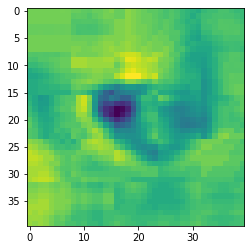

In [ ]:
resolution = 40
train_x_px = []
for i in range(X_train.shape[0]):
  temp = image_resize(X_train[i,:,:,:],resolution)
  train_x_px.append(temp)
X_train = np.array(train_x_px)
X_train = np.array(add_noise(X_train,.0002))
#X_train = cv2.cvtColor(X_train, cv2.COLOR_BGR2RGB)
plt.imshow(X_train[0,:,:,0])
#image_resize(X_train,32)

val_x_px = []
for i in range(X_val.shape[0]):
  temp = image_resize(X_val[i,:,:,:],resolution)
  val_x_px.append(temp)
X_val = np.array(val_x_px) 
X_val = np.array(add_noise(X_val,.0002))
#X_train.shape
y_train = np.array(y_train)
y_val = np.array(y_val)
#print(X_train[i,:,:,:])

Model: "functional_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 40, 40, 3)]       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 40, 40, 8)         608       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 40, 40, 8)         1608      
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 40, 40, 8)         1608      
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 40, 40, 8)         1608      
_________________________________________________________________
dense_30 (Dense)             (None, 40, 40, 8)         72        
_________________________________________________________________
flatten_15 (Flatten)         (None, 12800)           

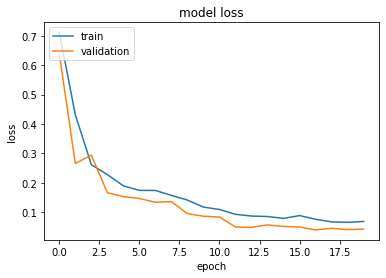

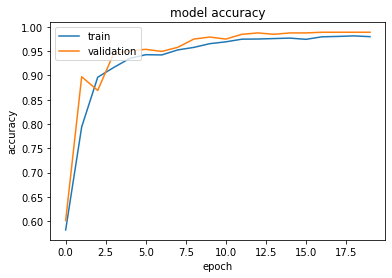

In [ ]:
image_size = (resolution,resolution,3)
model = k_model(image_size=image_size)
model.compile(loss='categorical_crossentropy', metrics='acc', optimizer='adam')
model.summary()
history1 = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))
plot_loss_acc(history1)

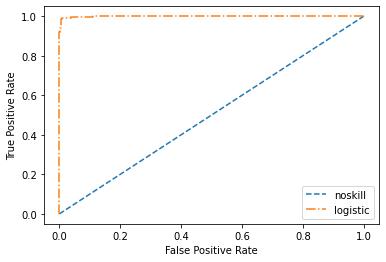

In [ ]:
noskill = [0 for _ in range(len(y_val))]
noskill = np.array(noskill).reshape(-1,1)
lrprob= model.predict(X_val)
lrprob = np.array(lrprob[:,1]).reshape(-1,1)
#print(lrprob[:,1])
no_auc = roc_auc_score(y_val,noskill)
lr_auc = roc_auc_score(y_val,lrprob)
no_fpr, no_tpr, _ =roc_curve(y_val[:,1], noskill)
lr_fpr, lr_tpr, _ =roc_curve(y_val[:,1], lrprob)
plt.plot(no_fpr, no_tpr, linestyle = '--', label = 'noskill')
plt.plot(lr_fpr, lr_tpr, linestyle = 'dashdot', label = 'logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Change noise by changing the stddev
Set stddev = 0.002

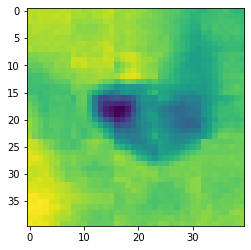

In [ ]:
resolution = 40
train_x_px = []
for i in range(X_train.shape[0]):
  temp = image_resize(X_train[i,:,:,:],resolution)
  train_x_px.append(temp)
X_train = np.array(train_x_px)
X_train = np.array(add_noise(X_train,.002))
#X_train = cv2.cvtColor(X_train, cv2.COLOR_BGR2RGB)
plt.imshow(X_train[0,:,:,0])
#image_resize(X_train,32)

val_x_px = []
for i in range(X_val.shape[0]):
  temp = image_resize(X_val[i,:,:,:],resolution)
  val_x_px.append(temp)
X_val = np.array(val_x_px) 
X_val = np.array(add_noise(X_val,.002))
#X_train.shape
y_train = np.array(y_train)
y_val = np.array(y_val)

Epoch 1/20
50/50 [==============================] - 1s 19ms/step - loss: 0.6460 - acc: 0.6523 - val_loss: 0.3933 - val_acc: 0.8563
Epoch 2/20
50/50 [==============================] - 1s 15ms/step - loss: 0.3255 - acc: 0.8708 - val_loss: 0.2494 - val_acc: 0.9085
Epoch 3/20
50/50 [==============================] - 1s 15ms/step - loss: 0.2356 - acc: 0.9176 - val_loss: 0.1882 - val_acc: 0.9324
Epoch 4/20
50/50 [==============================] - 1s 14ms/step - loss: 0.1900 - acc: 0.9383 - val_loss: 0.1473 - val_acc: 0.9648
Epoch 5/20
50/50 [==============================] - 1s 14ms/step - loss: 0.1674 - acc: 0.9479 - val_loss: 0.1340 - val_acc: 0.9549
Epoch 6/20
50/50 [==============================] - 1s 15ms/step - loss: 0.1799 - acc: 0.9450 - val_loss: 0.1253 - val_acc: 0.9690
Epoch 7/20
50/50 [==============================] - 1s 14ms/step - loss: 0.1310 - acc: 0.9627 - val_loss: 0.1074 - val_acc: 0.9648
Epoch 8/20
50/50 [==============================] - 1s 15ms/step - loss: 0.1361 - a

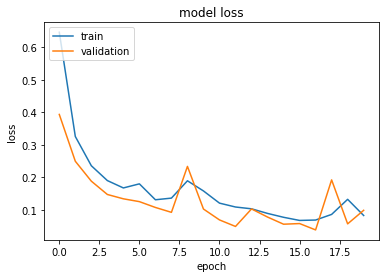

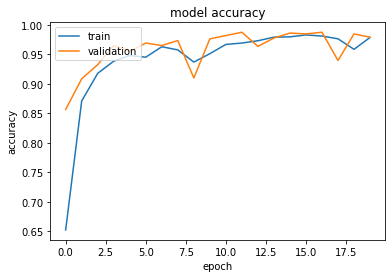

In [ ]:
image_size = (resolution,resolution,3)
model = k_model(image_size=image_size)
model.compile(loss='categorical_crossentropy', metrics='acc', optimizer='adam')

history2 = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))
plot_loss_acc(history2)

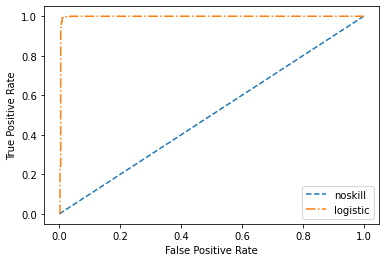

In [ ]:
noskill = [0 for _ in range(len(y_val))]
noskill = np.array(noskill).reshape(-1,1)
lrprob= model.predict(X_val)
lrprob = np.array(lrprob[:,1]).reshape(-1,1)
#print(lrprob[:,1])
no_auc = roc_auc_score(y_val,noskill)
lr_auc = roc_auc_score(y_val,lrprob)
no_fpr, no_tpr, _ =roc_curve(y_val[:,1], noskill)
lr_fpr, lr_tpr, _ =roc_curve(y_val[:,1], lrprob)
plt.plot(no_fpr, no_tpr, linestyle = '--', label = 'noskill')
plt.plot(lr_fpr, lr_tpr, linestyle = 'dashdot', label = 'logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Change noise by changing the stddev
Set stddev = 0.02

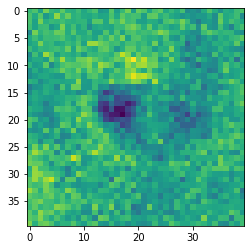

In [ ]:
resolution = 40
train_x_px = []
for i in range(X_train.shape[0]):
  temp = image_resize(X_train[i,:,:,:],resolution)
  train_x_px.append(temp)
X_train = np.array(train_x_px)
X_train = np.array(add_noise(X_train,.02))
#X_train = cv2.cvtColor(X_train, cv2.COLOR_BGR2RGB)
plt.imshow(X_train[0,:,:,0])
#image_resize(X_train,32)

val_x_px = []
for i in range(X_val.shape[0]):
  temp = image_resize(X_val[i,:,:,:],resolution)
  val_x_px.append(temp)
X_val = np.array(val_x_px) 
X_val = np.array(add_noise(X_val,.02))
#X_train.shape
y_train = np.array(y_train)
y_val = np.array(y_val)

Epoch 1/20
50/50 [==============================] - 1s 19ms/step - loss: 0.7051 - acc: 0.6056 - val_loss: 0.6525 - val_acc: 0.6014
Epoch 2/20
50/50 [==============================] - 1s 15ms/step - loss: 0.4665 - acc: 0.7819 - val_loss: 0.2849 - val_acc: 0.8817
Epoch 3/20
50/50 [==============================] - 1s 15ms/step - loss: 0.2653 - acc: 0.8926 - val_loss: 0.2290 - val_acc: 0.9211
Epoch 4/20
50/50 [==============================] - 1s 15ms/step - loss: 0.2309 - acc: 0.9170 - val_loss: 0.1874 - val_acc: 0.9352
Epoch 5/20
50/50 [==============================] - 1s 15ms/step - loss: 0.2020 - acc: 0.9320 - val_loss: 0.1521 - val_acc: 0.9606
Epoch 6/20
50/50 [==============================] - 1s 15ms/step - loss: 0.1821 - acc: 0.9403 - val_loss: 0.1577 - val_acc: 0.9380
Epoch 7/20
50/50 [==============================] - 1s 14ms/step - loss: 0.1800 - acc: 0.9380 - val_loss: 0.1372 - val_acc: 0.9606
Epoch 8/20
50/50 [==============================] - 1s 15ms/step - loss: 0.1678 - a

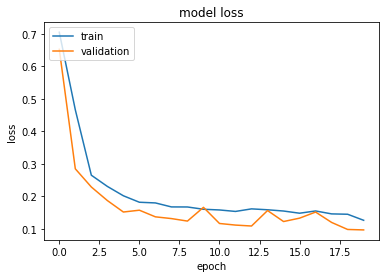

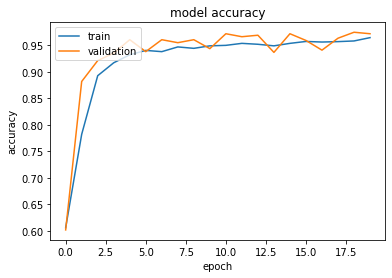

In [ ]:
image_size = (resolution,resolution,3)
model = k_model(image_size=image_size)
model.compile(loss='categorical_crossentropy', metrics='acc', optimizer='adam')

history3 = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))
plot_loss_acc(history3)

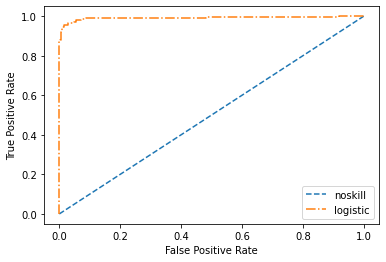

In [ ]:
noskill = [0 for _ in range(len(y_val))]
noskill = np.array(noskill).reshape(-1,1)
lrprob= model.predict(X_val)
lrprob = np.array(lrprob[:,1]).reshape(-1,1)
#print(lrprob[:,1])
no_auc = roc_auc_score(y_val,noskill)
lr_auc = roc_auc_score(y_val,lrprob)
no_fpr, no_tpr, _ =roc_curve(y_val[:,1], noskill)
lr_fpr, lr_tpr, _ =roc_curve(y_val[:,1], lrprob)
plt.plot(no_fpr, no_tpr, linestyle = '--', label = 'noskill')
plt.plot(lr_fpr, lr_tpr, linestyle = 'dashdot', label = 'logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Change noise by changing the stddev
Set stddev = 0.2

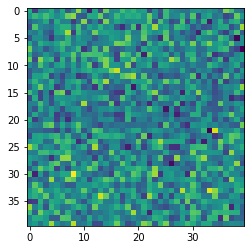

In [ ]:
resolution = 40
train_x_px = []
for i in range(X_train.shape[0]):
  temp = image_resize(X_train[i,:,:,:],resolution)
  train_x_px.append(temp)
X_train = np.array(train_x_px)
X_train = np.array(add_noise(X_train,.2))
#X_train = cv2.cvtColor(X_train, cv2.COLOR_BGR2RGB)
plt.imshow(X_train[0,:,:,0])
#image_resize(X_train,32)

val_x_px = []
for i in range(X_val.shape[0]):
  temp = image_resize(X_val[i,:,:,:],resolution)
  val_x_px.append(temp)
X_val = np.array(val_x_px) 
X_val = np.array(add_noise(X_val,.2))
#X_train.shape
y_train = np.array(y_train)
y_val = np.array(y_val)

Epoch 1/20
50/50 [==============================] - 1s 18ms/step - loss: 0.6767 - acc: 0.6059 - val_loss: 0.5304 - val_acc: 0.7915
Epoch 2/20
50/50 [==============================] - 1s 14ms/step - loss: 0.4197 - acc: 0.8112 - val_loss: 0.3736 - val_acc: 0.8254
Epoch 3/20
50/50 [==============================] - 1s 15ms/step - loss: 0.2999 - acc: 0.8812 - val_loss: 0.2604 - val_acc: 0.8873
Epoch 4/20
50/50 [==============================] - 1s 15ms/step - loss: 0.2617 - acc: 0.8985 - val_loss: 0.2340 - val_acc: 0.9070
Epoch 5/20
50/50 [==============================] - 1s 15ms/step - loss: 0.2523 - acc: 0.9031 - val_loss: 0.2762 - val_acc: 0.9282
Epoch 6/20
50/50 [==============================] - 1s 15ms/step - loss: 0.2316 - acc: 0.9169 - val_loss: 0.1968 - val_acc: 0.9254
Epoch 7/20
50/50 [==============================] - 1s 14ms/step - loss: 0.2060 - acc: 0.9264 - val_loss: 0.1812 - val_acc: 0.9366
Epoch 8/20
50/50 [==============================] - 1s 15ms/step - loss: 0.2068 - a

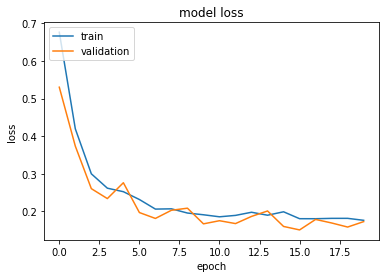

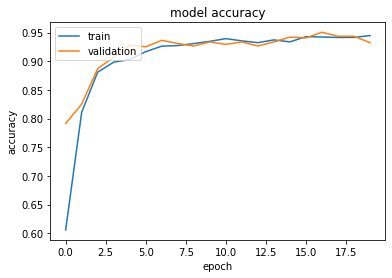

In [ ]:
image_size = (resolution,resolution,3)
model = k_model(image_size=image_size)
model.compile(loss='categorical_crossentropy', metrics='acc', optimizer='adam')

history4 = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))
plot_loss_acc(history4)

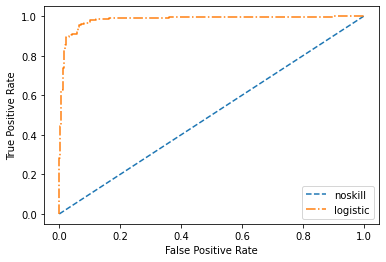

In [ ]:
noskill = [0 for _ in range(len(y_val))]
noskill = np.array(noskill).reshape(-1,1)
lrprob= model.predict(X_val)
lrprob = np.array(lrprob[:,1]).reshape(-1,1)
#print(lrprob[:,1])
no_auc = roc_auc_score(y_val,noskill)
lr_auc = roc_auc_score(y_val,lrprob)
no_fpr, no_tpr, _ =roc_curve(y_val[:,1], noskill)
lr_fpr, lr_tpr, _ =roc_curve(y_val[:,1], lrprob)
plt.plot(no_fpr, no_tpr, linestyle = '--', label = 'noskill')
plt.plot(lr_fpr, lr_tpr, linestyle = 'dashdot', label = 'logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Change noise by changing the stddev
Set stddev = 2

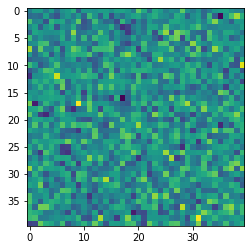

In [ ]:
resolution = 40
train_x_px = []
for i in range(X_train.shape[0]):
  temp = image_resize(X_train[i,:,:,:],resolution)
  train_x_px.append(temp)
X_train = np.array(train_x_px)
X_train = np.array(add_noise(X_train,2))
#X_train = cv2.cvtColor(X_train, cv2.COLOR_BGR2RGB)
plt.imshow(X_train[0,:,:,0])
#image_resize(X_train,32)

val_x_px = []
for i in range(X_val.shape[0]):
  temp = image_resize(X_val[i,:,:,:],resolution)
  val_x_px.append(temp)
X_val = np.array(val_x_px) 
X_val = np.array(add_noise(X_val,2))
#X_train.shape
y_train = np.array(y_train)
y_val = np.array(y_val)

Epoch 1/20
50/50 [==============================] - 1s 19ms/step - loss: 0.7194 - acc: 0.5680 - val_loss: 0.6999 - val_acc: 0.4183
Epoch 2/20
50/50 [==============================] - 1s 14ms/step - loss: 0.6740 - acc: 0.5950 - val_loss: 0.6797 - val_acc: 0.6676
Epoch 3/20
50/50 [==============================] - 1s 15ms/step - loss: 0.6486 - acc: 0.6271 - val_loss: 0.5886 - val_acc: 0.7028
Epoch 4/20
50/50 [==============================] - 1s 14ms/step - loss: 0.5849 - acc: 0.6870 - val_loss: 0.6258 - val_acc: 0.6521
Epoch 5/20
50/50 [==============================] - 1s 14ms/step - loss: 0.5654 - acc: 0.7039 - val_loss: 0.6203 - val_acc: 0.6592
Epoch 6/20
50/50 [==============================] - 1s 15ms/step - loss: 0.5264 - acc: 0.7377 - val_loss: 0.5979 - val_acc: 0.6859
Epoch 7/20
50/50 [==============================] - 1s 15ms/step - loss: 0.5215 - acc: 0.7382 - val_loss: 0.5850 - val_acc: 0.6901
Epoch 8/20
50/50 [==============================] - 1s 14ms/step - loss: 0.4827 - a

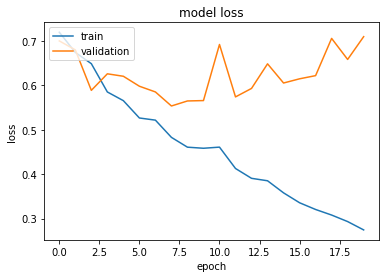

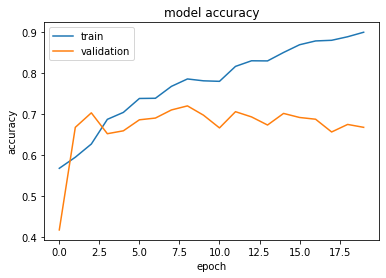

In [ ]:
image_size = (resolution,resolution,3)
model = k_model(image_size=image_size)
model.compile(loss='categorical_crossentropy', metrics='acc', optimizer='adam')

history5 = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))
plot_loss_acc(history5)

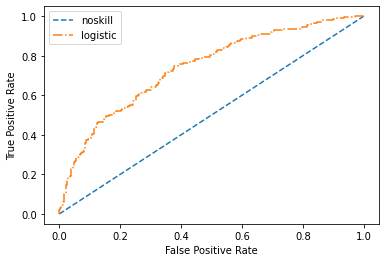

In [ ]:
noskill = [0 for _ in range(len(y_val))]
noskill = np.array(noskill).reshape(-1,1)
lrprob= model.predict(X_val)
lrprob = np.array(lrprob[:,1]).reshape(-1,1)
#print(lrprob[:,1])
no_auc = roc_auc_score(y_val,noskill)
lr_auc = roc_auc_score(y_val,lrprob)
no_fpr, no_tpr, _ =roc_curve(y_val[:,1], noskill)
lr_fpr, lr_tpr, _ =roc_curve(y_val[:,1], lrprob)
plt.plot(no_fpr, no_tpr, linestyle = '--', label = 'noskill')
plt.plot(lr_fpr, lr_tpr, linestyle = 'dashdot', label = 'logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()